# Results 

In [1]:
import numpy as np
import dill
from Optimizer_Scripts.functions import ackley_gen, rastrigin_gen, ackley_deriv_gen, rast_deriv_gen
from Optimizer_Scripts.optimizers import Adam, Momentum, NesterovMomentum
from Optimizer_Scripts.Delayer import Delayer
import os
import re
import matplotlib.pyplot as plt

In [2]:
maxiter=5000
tol=1e-5

In [3]:
del_dir = '../results/True'
un_dir = '../results/False'
rast_del_sym = list()
ack_del_sym = list()
rast_del_unsym = list()
ack_del_unsym = list()
rast_undel = list()
ack_undel = list()

In [4]:
#get the undelayed tests
for filename in os.listdir(del_dir):
    delay_object = dill.load( open(del_dir+"/"+filename, "rb" ) ) 
    if re.match(r"^test_True_.*_Rastrigin", filename):
        rast_del_sym.append(delay_object)
    elif re.match(r"^test_True_.*_Ackley", filename):
        ack_del_sym.append(delay_object)
    elif re.match(r"^test_False_.*_Rastrigin", filename):
        rast_del_unsym.append(delay_object)
    elif re.match(r"^test_False.*_Ackley", filename):
        ack_del_unsym.append(delay_object)
    else:
        print("file did not match")
        print(filename)
#get the undelayed tests        
for filename in os.listdir(un_dir):
    delay_object = dill.load( open(un_dir+"/"+filename, "rb" ) )
    if re.match(r"^test_.*_Ackley", filename):
        ack_undel.append(delay_object)
    elif re.match(r"^test_.*_Rastrigin", filename):
        rast_undel.append(delay_object)
    else:
        print("file did not match") 
        print(filename)

## The tests for learning rate hyperparameter

### The delayed symmetric ackley tests

{'learning_rate': 0.26841276220784394, 'beta_1': 0.9, 'beta_2': 0.999}


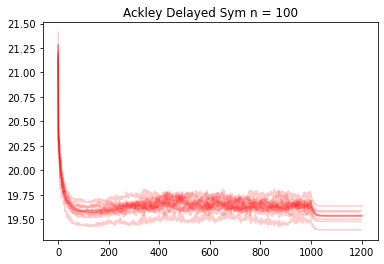

{'learning_rate': 0.9086238105326679, 'beta_1': 0.9, 'beta_2': 0.999}


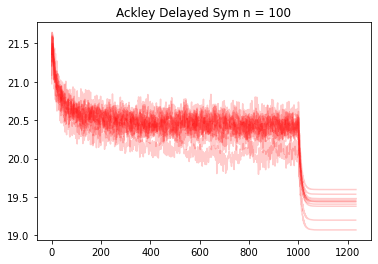

{'learning_rate': 0.11972273746704498, 'beta_1': 0.9, 'beta_2': 0.999}


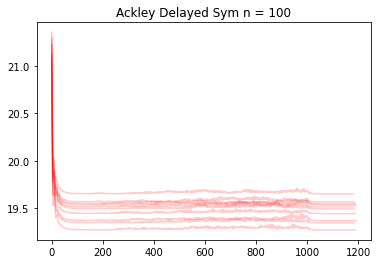

{'learning_rate': 1.3561156087997737, 'beta_1': 0.9, 'beta_2': 0.999}


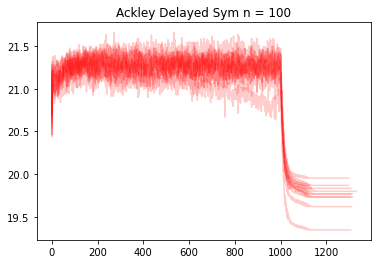

{'learning_rate': 1.2551702163752958, 'beta_1': 0.9, 'beta_2': 0.999}


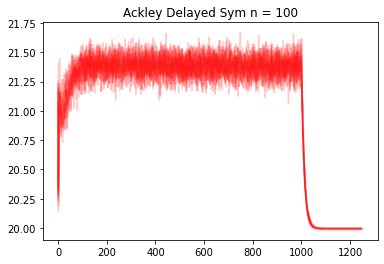

{'learning_rate': 0.8129747967338563, 'beta_1': 0.9, 'beta_2': 0.999}


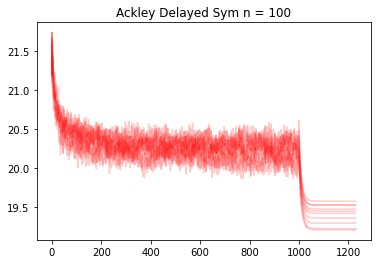

{'learning_rate': 0.6483069067255058, 'beta_1': 0.9, 'beta_2': 0.999}


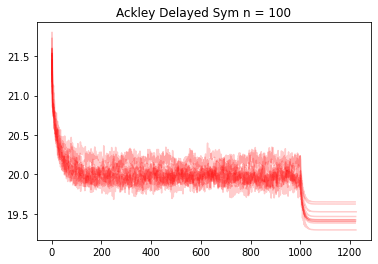

{'learning_rate': 1.1688558655973398, 'beta_1': 0.9, 'beta_2': 0.999}


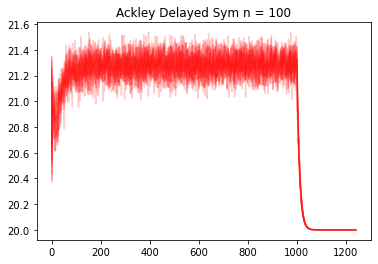

{'learning_rate': 1.2165515431533667, 'beta_1': 0.9, 'beta_2': 0.999}


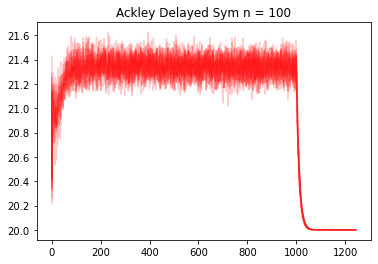

{'learning_rate': 1.067617869755166, 'beta_1': 0.9, 'beta_2': 0.999}


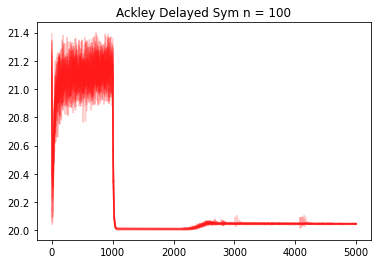

In [5]:
for i in ack_del_sym:
    print(i.Optimizer.params)
    plt.clf()
    for j in range(10):
        i.x_init = np.random.uniform(-32.,32.,i.n)
        i.compute_time_series(use_delays=True, maxiter=maxiter, tol=tol, symmetric_delays=True, random=True)
        x_vals = list()
        for k in range(len(i.time_series)):
            x_vals.append(i.loss_function(i.time_series[k,:]))
        i.delete_time_series()
        ys = np.arange(0, len(x_vals),1)
        plt.plot(ys, x_vals, 'r', alpha=0.2)
    plt.title("Ackley Delayed Sym n = {}".format(i.n))
    #plt.legend(loc='upper right')
    plt.show()            

### The delayed nonsymmetric ackley tests

{'learning_rate': 0.010465667910141004, 'beta_1': 0.9, 'beta_2': 0.999}


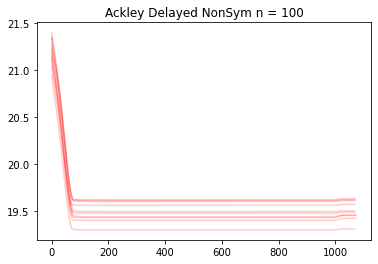

{'learning_rate': 0.02614465484283912, 'beta_1': 0.9, 'beta_2': 0.999}


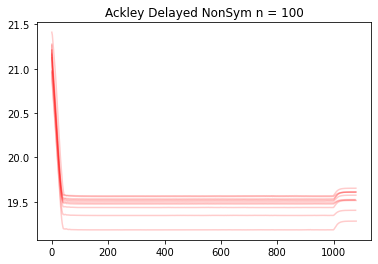

{'learning_rate': 0.05647878392699521, 'beta_1': 0.9, 'beta_2': 0.999}


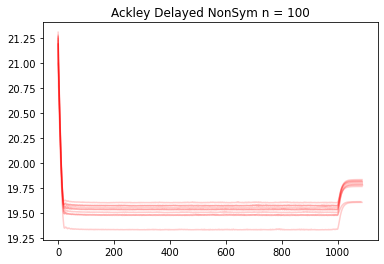

{'learning_rate': 1.4367794741338429, 'beta_1': 0.9, 'beta_2': 0.999}


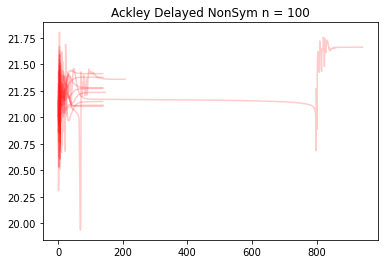

{'learning_rate': 0.07585368044987639, 'beta_1': 0.9, 'beta_2': 0.999}


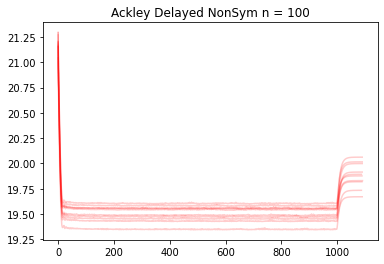

{'learning_rate': 0.1989175501306168, 'beta_1': 0.9, 'beta_2': 0.999}


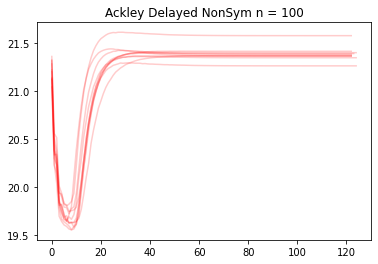

{'learning_rate': 1.170010176417118, 'beta_1': 0.9, 'beta_2': 0.999}


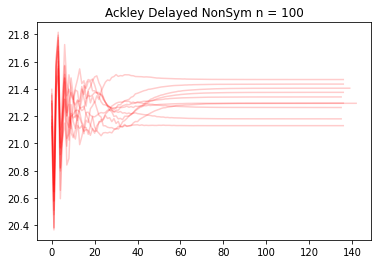

{'learning_rate': 0.5971328681939594, 'beta_1': 0.9, 'beta_2': 0.999}


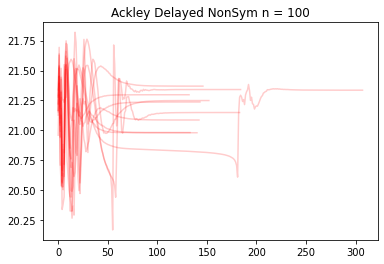

{'learning_rate': 1.429030419033193, 'beta_1': 0.9, 'beta_2': 0.999}


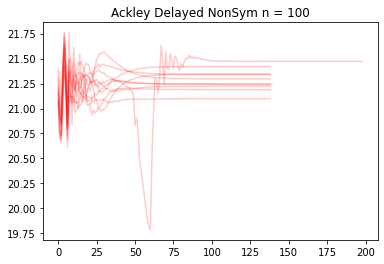

{'learning_rate': 1.4844274076913182, 'beta_1': 0.9, 'beta_2': 0.999}


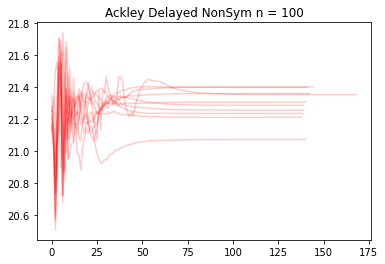

In [6]:
for i in ack_del_unsym:
    print(i.Optimizer.params)
    plt.clf()
    for j in range(10):
        i.x_init = np.random.uniform(-32.,32.,i.n)
        i.compute_time_series(use_delays=True, maxiter=maxiter, tol=tol, symmetric_delays=False, random=True)
        x_vals = list()
        for k in range(len(i.time_series)):
            x_vals.append(i.loss_function(i.time_series[k,:]))
        i.delete_time_series()
        ys = np.arange(0, len(x_vals),1)
        plt.plot(ys, x_vals, 'r', alpha=0.2)
    plt.title("Ackley Delayed NonSym n = {}".format(i.n))
    #plt.legend(loc='upper right')
    plt.show()        

### The undelayed ackley tests

{'learning_rate': 0.4273061770573641, 'beta_1': 0.9, 'beta_2': 0.999}


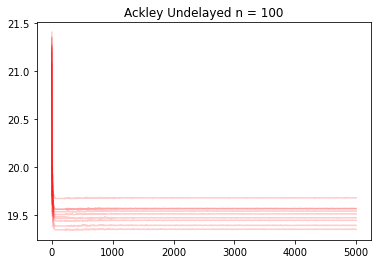

{'learning_rate': 0.5882225163159515, 'beta_1': 0.9, 'beta_2': 0.999}


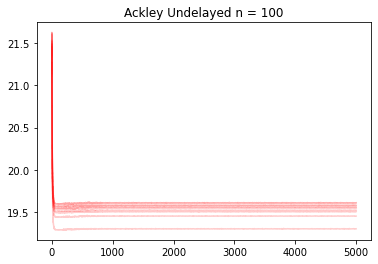

{'learning_rate': 0.08674798813021777, 'beta_1': 0.9, 'beta_2': 0.999}


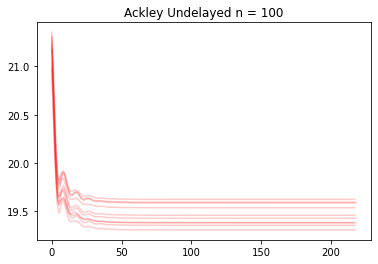

{'learning_rate': 1.1130041119469434, 'beta_1': 0.9, 'beta_2': 0.999}


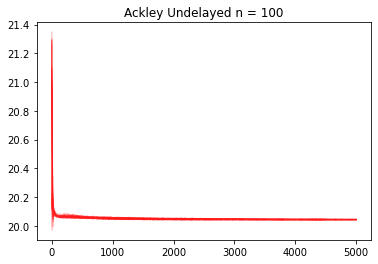

{'learning_rate': 1.0207041498785474, 'beta_1': 0.9, 'beta_2': 0.999}


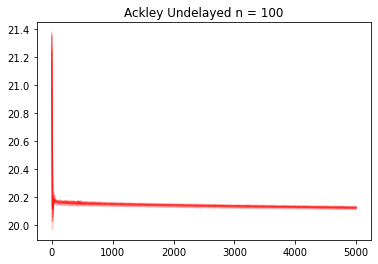

{'learning_rate': 0.2896962872857063, 'beta_1': 0.9, 'beta_2': 0.999}


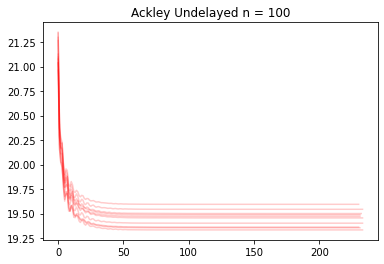

{'learning_rate': 0.6005631637338011, 'beta_1': 0.9, 'beta_2': 0.999}


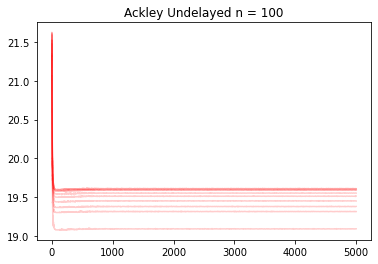

{'learning_rate': 0.2358557105988236, 'beta_1': 0.9, 'beta_2': 0.999}


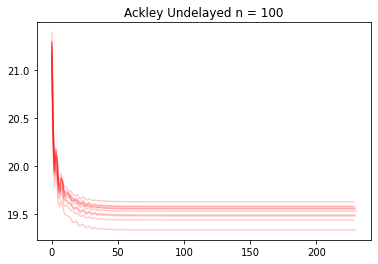

{'learning_rate': 1.2772705345263515, 'beta_1': 0.9, 'beta_2': 0.999}


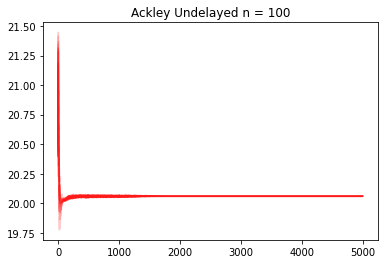

{'learning_rate': 1.3748935388213719, 'beta_1': 0.9, 'beta_2': 0.999}


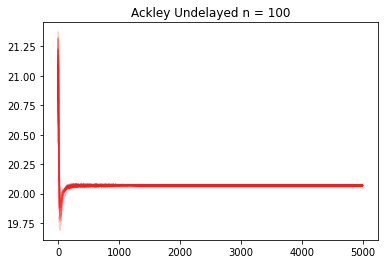

In [7]:
for i in ack_undel:
    print(i.Optimizer.params)
    plt.clf()
    for j in range(10):
        i.x_init = np.random.uniform(-32.,32.,i.n)
        i.compute_time_series(use_delays=False, maxiter=maxiter, tol=tol, symmetric_delays=True, random=True)
        x_vals = list()
        for k in range(len(i.time_series)):
            x_vals.append(i.loss_function(i.time_series[k,:]))
        i.delete_time_series()
        ys = np.arange(0, len(x_vals),1)
        plt.plot(ys, x_vals, 'r', alpha=0.2)
    plt.title("Ackley Undelayed n = {}".format(i.n))
    #plt.legend(loc='upper right')
    plt.show()

### The delayed symmetric rastrigin tests

{'learning_rate': 0.9985212723774748, 'beta_1': 0.9, 'beta_2': 0.999}


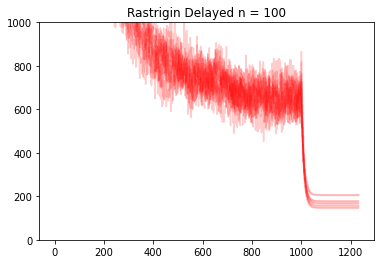

{'learning_rate': 1.2030480790723823, 'beta_1': 0.9, 'beta_2': 0.999}


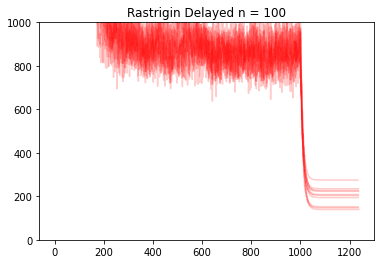

{'learning_rate': 1.2592076947278479, 'beta_1': 0.9, 'beta_2': 0.999}


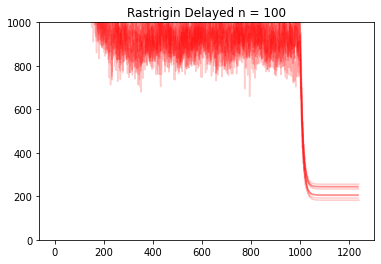

{'learning_rate': 0.7861707016819773, 'beta_1': 0.9, 'beta_2': 0.999}


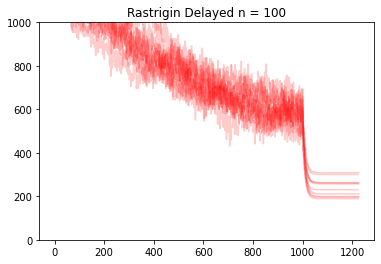

{'learning_rate': 1.1893803057909982, 'beta_1': 0.9, 'beta_2': 0.999}


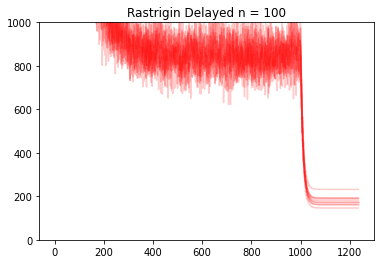

{'learning_rate': 0.5604642615139703, 'beta_1': 0.9, 'beta_2': 0.999}


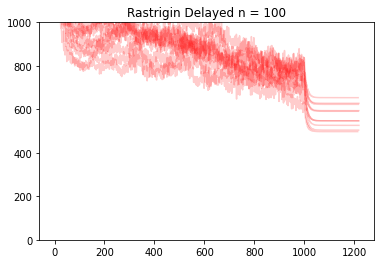

{'learning_rate': 0.8137061245646219, 'beta_1': 0.9, 'beta_2': 0.999}


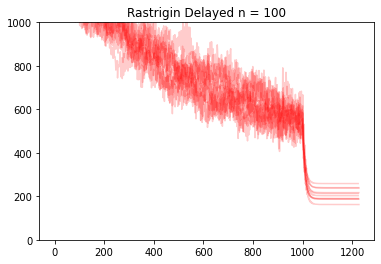

{'learning_rate': 1.0621080019552251, 'beta_1': 0.9, 'beta_2': 0.999}


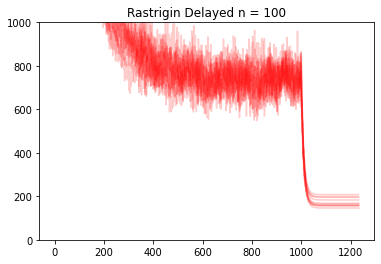

{'learning_rate': 0.6994979432529838, 'beta_1': 0.9, 'beta_2': 0.999}


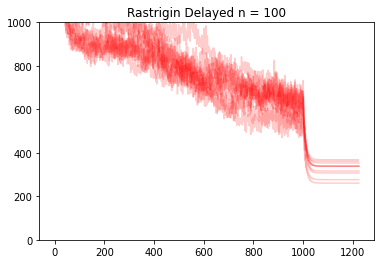

{'learning_rate': 0.5882134717754758, 'beta_1': 0.9, 'beta_2': 0.999}


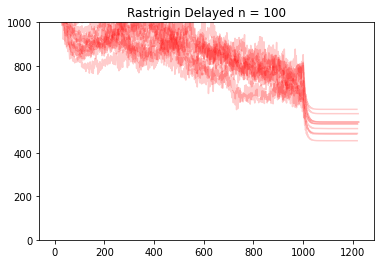

In [13]:
for i in rast_del_sym:
    print(i.Optimizer.params)
    plt.clf()
    for j in range(10):
        i.x_init = np.random.uniform(-5.12,5.12,i.n)
        i.compute_time_series(use_delays=True, maxiter=maxiter, tol=tol, symmetric_delays=True, random=True)
        x_vals = list()
        for k in range(len(i.time_series)):
            x_vals.append(i.loss_function(i.time_series[k,:]))
        i.delete_time_series()
        ys = np.arange(0, len(x_vals),1)
        plt.plot(ys, x_vals, 'r', alpha=0.2)
    plt.title("Rastrigin Delayed n = {}".format(i.n))
    plt.ylim([0,1000])
    #plt.legend(loc='upper right')
    plt.show()

### The delayed nonsymmetric rastrigin tests

{'learning_rate': 1.333541398329741, 'beta_1': 0.9, 'beta_2': 0.999}


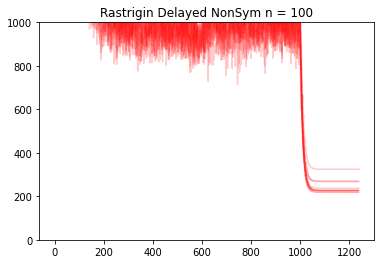

{'learning_rate': 0.7551616545566071, 'beta_1': 0.9, 'beta_2': 0.999}


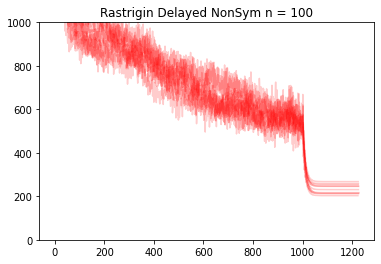

{'learning_rate': 1.3487662494110522, 'beta_1': 0.9, 'beta_2': 0.999}


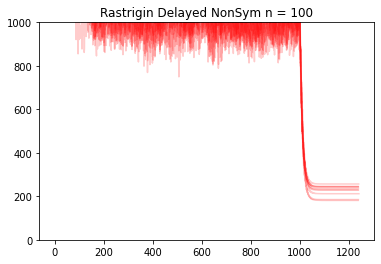

{'learning_rate': 0.7925724225150279, 'beta_1': 0.9, 'beta_2': 0.999}


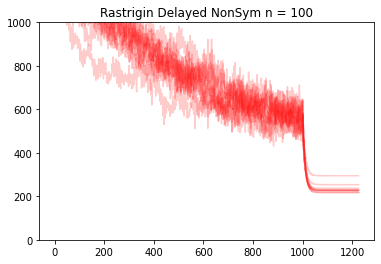

{'learning_rate': 1.3747100273757835, 'beta_1': 0.9, 'beta_2': 0.999}


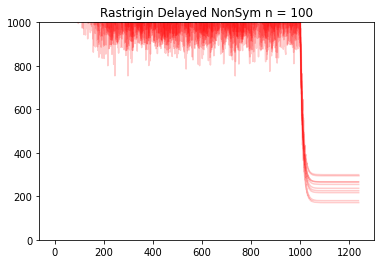

{'learning_rate': 1.244348112678522, 'beta_1': 0.9, 'beta_2': 0.999}


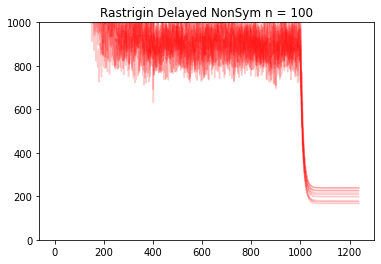

{'learning_rate': 1.3034831494666363, 'beta_1': 0.9, 'beta_2': 0.999}


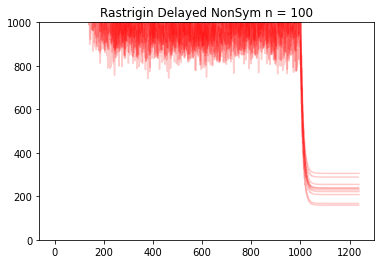

{'learning_rate': 1.0956900089036192, 'beta_1': 0.9, 'beta_2': 0.999}


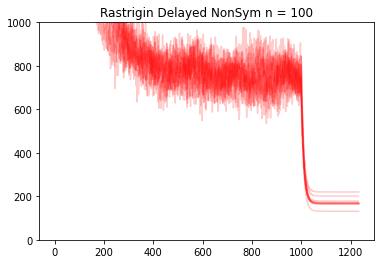

{'learning_rate': 0.41366644811849423, 'beta_1': 0.9, 'beta_2': 0.999}


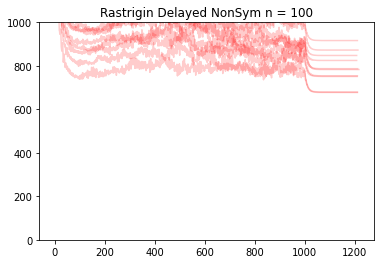

{'learning_rate': 1.0488712832658054, 'beta_1': 0.9, 'beta_2': 0.999}


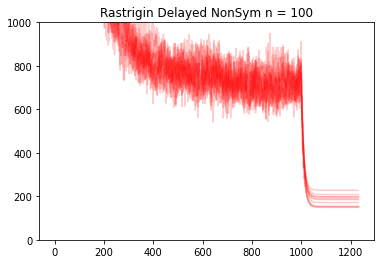

In [14]:
for i in rast_del_unsym:
    print(i.Optimizer.params)
    plt.clf()
    for j in range(10):
        i.x_init = np.random.uniform(-5.12,5.12,i.n)
        i.compute_time_series(use_delays=True, maxiter=maxiter, tol=tol, symmetric_delays=False, random=True)
        x_vals = list()
        for k in range(len(i.time_series)):
            x_vals.append(i.loss_function(i.time_series[k,:]))
        i.delete_time_series()
        ys = np.arange(0, len(x_vals),1)
        plt.plot(ys, x_vals, 'r', alpha=0.2)
    plt.title("Rastrigin Delayed NonSym n = {}".format(i.n))
    #plt.legend(loc='upper right')
    plt.ylim([0,1000])
    plt.show()

### The undelayed rastrigin tests

{'learning_rate': 0.31423688558875074, 'beta_1': 0.9, 'beta_2': 0.999}


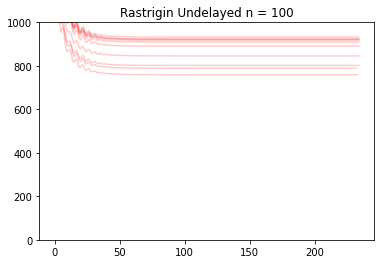

{'learning_rate': 0.17291003152180523, 'beta_1': 0.9, 'beta_2': 0.999}


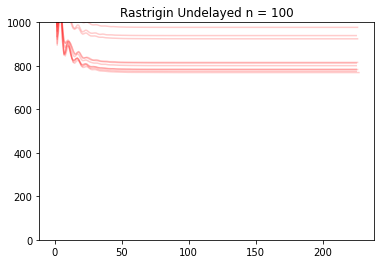

{'learning_rate': 1.0433086567432075, 'beta_1': 0.9, 'beta_2': 0.999}


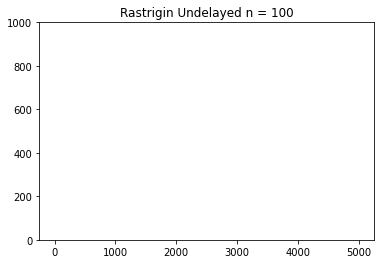

{'learning_rate': 1.1226594939833137, 'beta_1': 0.9, 'beta_2': 0.999}


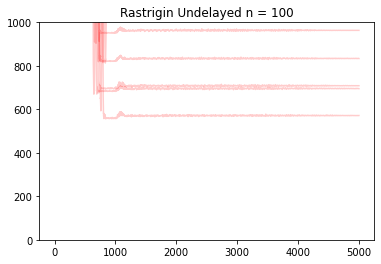

{'learning_rate': 1.129627900374859, 'beta_1': 0.9, 'beta_2': 0.999}


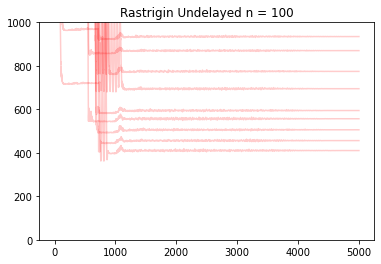

{'learning_rate': 0.0008499595540836791, 'beta_1': 0.9, 'beta_2': 0.999}


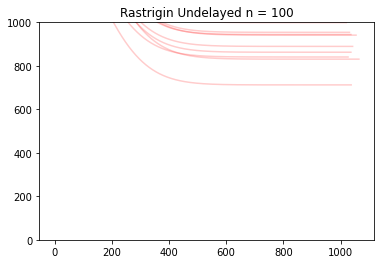

{'learning_rate': 0.30493799930203647, 'beta_1': 0.9, 'beta_2': 0.999}


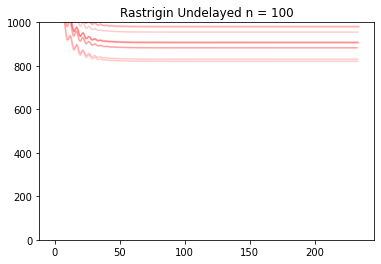

{'learning_rate': 0.08903461498975536, 'beta_1': 0.9, 'beta_2': 0.999}


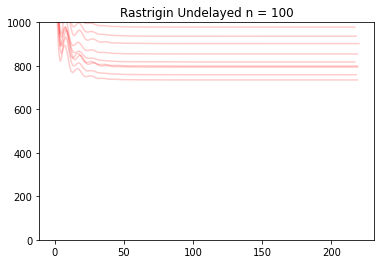

{'learning_rate': 0.1067157828129377, 'beta_1': 0.9, 'beta_2': 0.999}


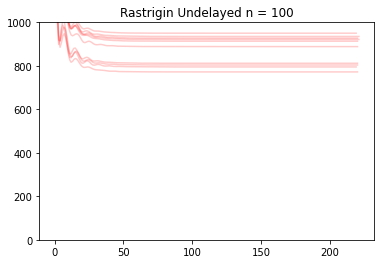

{'learning_rate': 0.1997898891857296, 'beta_1': 0.9, 'beta_2': 0.999}


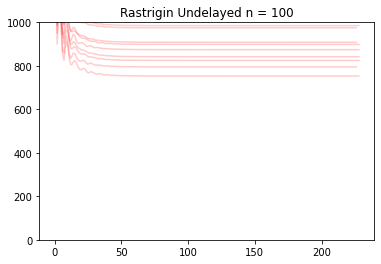

In [15]:
rast_test = rastrigin_gen(100)
ack_test = ackley_gen(100)
for i in rast_undel:
    print(i.Optimizer.params)
    plt.clf()
    for j in range(10):
        i.x_init = np.random.uniform(-5.12,5.12,i.n)
        i.compute_time_series(use_delays=False, maxiter=maxiter, tol=tol, symmetric_delays=True, random=True)
        x_vals = list()
        for k in range(len(i.time_series)):
            x_vals.append(i.loss_function(i.time_series[k,:]))
        i.delete_time_series()
        ys = np.arange(0, len(x_vals),1)
        plt.plot(ys, x_vals, 'r', alpha=0.2)
    plt.title("Rastrigin Undelayed n = {}".format(i.n))
    plt.ylim([0,1000])
    #plt.legend(loc='upper right')
    plt.show()

In [ ]:
#test with varying time delays